# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a Fake Dataset

## Employee Dataset 

In [31]:
!pip install Faker 


In [32]:
import random
from random import choices 

USA_States=['New Jersy','New York','North Carolina','Pennsylvania','Rhode Island','South Carolina','Virginia''Connecticut','Delaware','Florida','Georgia','Maine','Maryland','Massachusetts','New Hampshire']
print(len(USA_States))

States_list = choices(USA_States, k=10000)
print(set(States_list))



14
{'Georgia', 'Florida', 'New York', 'New Jersy', 'New Hampshire', 'South Carolina', 'Maine', 'Pennsylvania', 'Maryland', 'VirginiaConnecticut', 'Rhode Island', 'Delaware', 'Massachusetts', 'North Carolina'}


In [33]:
for e in USA_States:
    print(e,States_list.count(e))
    

New Jersy 712
New York 692
North Carolina 699
Pennsylvania 703
Rhode Island 707
South Carolina 676
VirginiaConnecticut 727
Delaware 649
Florida 740
Georgia 728
Maine 748
Maryland 710
Massachusetts 774
New Hampshire 735


In [34]:
## Creating Random Employee_id

Employee_id = random.sample(range(10001,99999),10000)

Employee_id[:5]

[88604, 84899, 81640, 39958, 56764]

In [35]:
## Creating Random Phone_number 

Phone_number = random.sample(range(10000001,99999999),10000)
Phone_number[:5]

[97563955, 28301366, 79476807, 37074190, 99600141]

In [36]:
#Listing Firstnames of the Employee  


from faker.providers.person.en import Provider
firstnames = list(set(Provider.first_names))
random.seed(44)
random.shuffle(firstnames)
print(len(firstnames))
print(firstnames[:5])
firstnames_2 = list(set(Provider.first_names))[:10000-6824]
random.seed(42)
random.shuffle(firstnames_2)
print(len(firstnames_2))
print(firstnames_2[:5])

6824
['Beth', 'Yaretzi', 'Sonya', 'Chanda', 'Curley']
3176
['Malvin', 'Anastacia', 'Ula', 'Brenden', 'Katharyn']


In [37]:
firstnames.extend(firstnames_2)
random.shuffle(firstnames)


print(firstnames[:5])

['Daija', 'Kenisha', 'Armand', 'Karel', 'Rosaria']


In [38]:
#Listing Firstnames of the Employee  


from faker.providers.person.en import Provider

lastnames_list = list(Provider.last_names)

random.seed(44)
random.shuffle(lastnames_list)


print(firstnames[:10])

lastnames = lastnames_list*30
lastnames = lastnames[:10000]
random.shuffle(lastnames)

lastnames[:10]

['Daija', 'Kenisha', 'Armand', 'Karel', 'Rosaria', 'Jaxton', 'Lauren', 'Sasha', 'Carole', 'Aline']


['Tromp',
 "D'Amore",
 'Halvorson',
 'Berge',
 'Torp',
 'Thiel',
 'Mitchell',
 'Will',
 'Doyle',
 'Runolfsson']

In [39]:
for e in [Employee_id, firstnames, lastnames, Phone_number, States_list]:
    print(len(set(e)))

10000
6824
473
10000
14


In [40]:
## Displaying Employee Dataframe

df_Employee = pd.DataFrame({'Employee ID':Employee_id, 'First name':firstnames, 'Last name':lastnames, 'Phone Number':Phone_number, 'State':States_list})
df_Employee.head()

,Employee ID,First name,Last name,Phone Number,State
0,88604,Daija,Tromp,97563955,Rhode Island
1,84899,Kenisha,D'Amore,28301366,Maryland
2,81640,Armand,Halvorson,79476807,New Jersy
3,39958,Karel,Berge,37074190,New Hampshire
4,56764,Rosaria,Torp,99600141,New Hampshire


In [41]:
# Displaying Employee Data Frame Length
print(len(df_Employee))


10000


### Salary Dataset 

In [42]:
## Creating Random department ID

Department_id = [random.randint(1,7) for e in range(10000)]

print(len(Department_id))
Department_id[:5]

10000


[7, 4, 7, 1, 3]

In [43]:
## Creating the anual salary details

Salary_Details = [random.randint(50000,214000) for e in range(10000)]
Salary_Details[:5]

[105355, 209417, 98478, 170477, 86713]

In [46]:
## Displaying Salary Dataframe

df_SalaryDetails = pd.DataFrame({'Employee ID':Employee_id, 'DEPARTMENT ID':Department_id, 'Yearly Salary':Salary_Details})
df_SalaryDetails.head()

,Employee ID,DEPARTMENT ID,Yearly Salary
0,88604,7,105355
1,84899,4,209417
2,81640,7,98478
3,39958,1,170477
4,56764,3,86713


In [47]:
## Verifying the missing values
df_SalaryDetails.isnull().sum()

Employee ID      0
DEPARTMENT ID    0
Yearly Salary    0
dtype: int64

In [48]:
df_SalaryDetails['DEPARTMENT ID'].unique()

array([7, 4, 1, 3, 5, 6, 2])

### Department Dataset 

In [49]:
df_Department = pd.DataFrame({'DEPARTMENT ID':list(range(1,8))})
df_Department

,DEPARTMENT ID
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [50]:
Department_dict = {1:'Supervisor', 2:'Software', 3:'Lawyer', 4:'Engineer', 4:'Seller', 5:'Market', 6:'Admin', 7:'Manager'}

df_Department['DEPARTMENT NAME'] = df_Department['DEPARTMENT ID'].map(Department_dict)

In [51]:
df_Department

,DEPARTMENT ID,DEPARTMENT NAME
0,1,Supervisor
1,2,Software
2,3,Lawyer
3,4,Seller
4,5,Market
5,6,Admin
6,7,Manager


### Questions 

#### 1. Visualize the average salary of each department 

In [52]:
df_SalaryDetails.columns

Index(['Employee ID', 'DEPARTMENT ID', 'Yearly Salary'], dtype='object')

In [53]:
df_A1 = pd.merge(df_SalaryDetails, df_Department,how='right', on='DEPARTMENT ID')
df_A1.head()

,Employee ID,DEPARTMENT ID,Yearly Salary,DEPARTMENT NAME
0,39958,1,170477,Supervisor
1,38682,1,209896,Supervisor
2,80050,1,137440,Supervisor
3,46991,1,67174,Supervisor
4,21751,1,145773,Supervisor


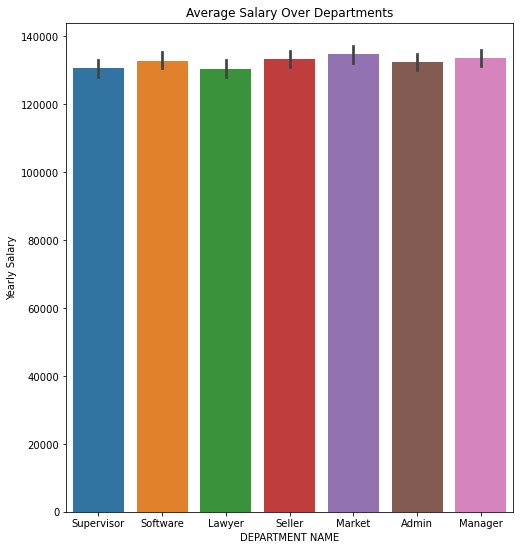

In [54]:
plt.figure(figsize=(8,9))

sns.barplot(data=df_A1, x='DEPARTMENT NAME', y='Yearly Salary')
plt.title('Average Salary Over Departments')
plt.show()

We have seen all the similar salaries for each departments with various



#### 2. Visualize the total number of employees living in each state for each department 

In [55]:
df_Employee.columns

Index(['Employee ID', 'First name', 'Last name', 'Phone Number', 'State'], dtype='object')

In [56]:

df_A2 = pd.merge(df_SalaryDetails, df_Department, how='right', on='DEPARTMENT ID')
df_A2.head()

,Employee ID,DEPARTMENT ID,Yearly Salary,DEPARTMENT NAME
0,39958,1,170477,Supervisor
1,38682,1,209896,Supervisor
2,80050,1,137440,Supervisor
3,46991,1,67174,Supervisor
4,21751,1,145773,Supervisor


In [57]:


df_B2 = pd.merge(df_A2, df_Employee[['Employee ID', 'State']], how='left', on='Employee ID')
df_B2.head()

,Employee ID,DEPARTMENT ID,Yearly Salary,DEPARTMENT NAME,State
0,39958,1,170477,Supervisor,New Hampshire
1,38682,1,209896,Supervisor,VirginiaConnecticut
2,80050,1,137440,Supervisor,Maryland
3,46991,1,67174,Supervisor,Maryland
4,21751,1,145773,Supervisor,Pennsylvania


In [59]:
df_B2['State'].unique()

array(['New Hampshire', 'VirginiaConnecticut', 'Maryland', 'Pennsylvania',
       'North Carolina', 'Delaware', 'Florida', 'Rhode Island',
       'South Carolina', 'New York', 'Massachusetts', 'Georgia', 'Maine',
       'New Jersy'], dtype=object)

In [63]:
data=df_B2[(df_B2['State'] == 'VirginiaConnecticut') | (df_B2['State'] == 'Georgia') | 
                       (df_B2['State'] == 'Maine') |(df_B2['State'] == 'Maryland') | 
                       (df_B2['State'] == 'Massachusetts')].groupby(['State','DEPARTMENT ID']).count()
data.loc['Delaware':'VirginiaConnecticut']

Employee ID  Yearly Salary  DEPARTMENT NAME
State               DEPARTMENT ID                                             
Georgia             1                       99             99               99
                    2                       95             95               95
                    3                      117            117              117
                    4                       96             96               96
                    5                      105            105              105
                    6                      108            108              108
                    7                      108            108              108
Maine               1                      108            108              108
                    2                      116            116              116
                    3                      110            110              110
                    4                      112            112              112
                    5                       99             99               99
                    6                      118            118              118
                    7                       85             85               85
Maryland            1                      109            109              109
                    2                      101            101              101
                    3                      133            133              133
                    4                       83             83               83
                    5                       87             87               87
                    6                      101            101              101
                    7                       96             96               96
Massachusetts       1                      109            109              109
                    2                      105            105              105
                    3                      112            112              112
                    4                      124            124              124
                    5                       88             88               88
                    6                      105            105              105
                    7                      131            131              131
VirginiaConnecticut 1                      116            116              116
                    2                       98             98               98
                    3                      101            101              101
                    4                       98             98               98
                    5                      102            102              102
                    6                      111            111              111
                    7                      101            101              101

<Figure size 504x648 with 0 Axes>

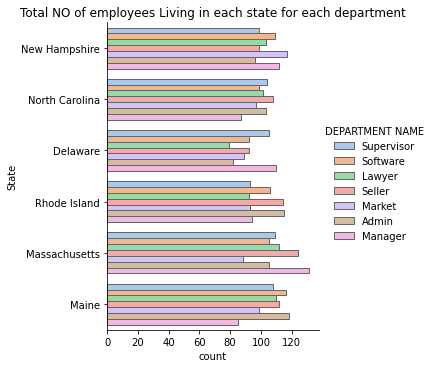

In [66]:
plt.figure(figsize=(7,9))

sns.catplot(y='State', hue='DEPARTMENT NAME', kind='count', edgecolor='0.4',
            palette='pastel',
            data=df_B2[(df_B2['State'] == 'New Jersey') | (df_B2['State'] == 'North Carolina') | 
                       (df_B2['State'] == 'Maine') |(df_B2['State'] == 'Delaware') | 
                       (df_B2['State'] == 'Massachusetts') | (df_B2['State'] == 'New Hampshire') | 
                       (df_B2['State'] == 'Rhode Island')])
plt.title('Total NO of employees Living in each state for each department')

plt.show()

<Figure size 504x648 with 0 Axes>

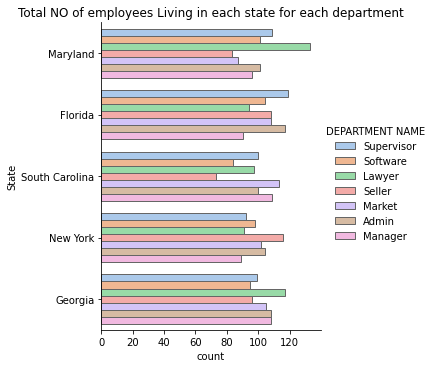

In [68]:
plt.figure(figsize=(7,9))

sns.catplot(y='State', hue='DEPARTMENT NAME', kind='count', edgecolor='0.4',
            palette='pastel',
            data=df_B2[(df_B2['State'] == 'Florida') |
                (df_B2['State'] == 'Virginia') | (df_B2['State'] == 'Connecticut') | 
                       (df_B2['State'] == 'New York') | (df_B2['State'] == 'Maryland') | 
                       (df_B2['State'] == 'South Carolina') |
      (df_B2['State'] == 'Georgia')])
plt.title('Total NO of employees Living in each state for each department')

plt.show()

#### 3. Visualize salary distribution of different states 

In [69]:
df_C3 = pd.merge(df_Employee, df_SalaryDetails, how='left', on='Employee ID')
df_C3.head()

,Employee ID,First name,Last name,Phone Number,State,DEPARTMENT ID,Yearly Salary
0,88604,Daija,Tromp,97563955,Rhode Island,7,105355
1,84899,Kenisha,D'Amore,28301366,Maryland,4,209417
2,81640,Armand,Halvorson,79476807,New Jersy,7,98478
3,39958,Karel,Berge,37074190,New Hampshire,1,170477
4,56764,Rosaria,Torp,99600141,New Hampshire,3,86713


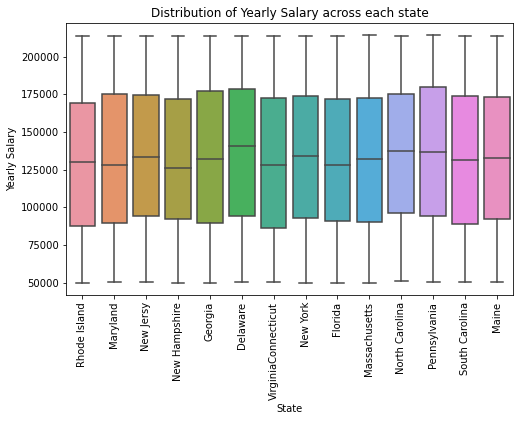

In [73]:
plt.figure(figsize=(8,5))

sns.boxplot(x='State', y='Yearly Salary',data=df_C3)

plt.title('Distribution of Yearly Salary across each state')
plt.xticks(rotation=90)

plt.show()

#### 4. Visualize salary distribution of different departments

In [74]:
df_D2 = pd.merge(df_Employee, df_SalaryDetails, how='left', on='Employee ID')

df_D4 = pd.merge(df_D2, df_Department, how='left', on='DEPARTMENT ID')
df_D4.head()

,Employee ID,First name,Last name,Phone Number,State,DEPARTMENT ID,Yearly Salary,DEPARTMENT NAME
0,88604,Daija,Tromp,97563955,Rhode Island,7,105355,Manager
1,84899,Kenisha,D'Amore,28301366,Maryland,4,209417,Seller
2,81640,Armand,Halvorson,79476807,New Jersy,7,98478,Manager
3,39958,Karel,Berge,37074190,New Hampshire,1,170477,Supervisor
4,56764,Rosaria,Torp,99600141,New Hampshire,3,86713,Lawyer


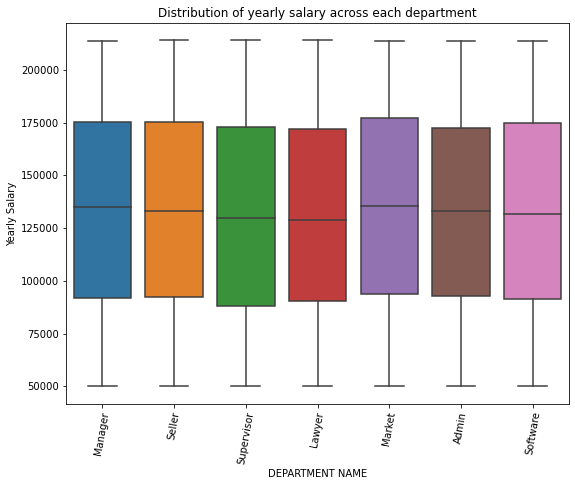

In [77]:
plt.figure(figsize=(9,7))

sns.boxplot(x='DEPARTMENT NAME', y='Yearly Salary',data=df_D4)

plt.title('Distribution of yearly salary across each department')
plt.xticks(rotation=80)

plt.show()

### Salary distribution as Normal distribution

<AxesSubplot:xlabel='Yearly Salary', ylabel='Density'>

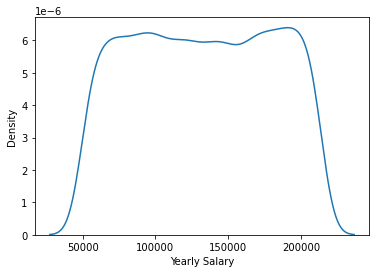

In [78]:
sns.kdeplot(df_SalaryDetails['Yearly Salary'])